# <center>Тема 2. Візуальний аналіз даних з Python
## <center>Частина 2. Обзор бібліотеки Matplotlib

**Matplotlib** – це пакет для Python, який дає багато можливостей для візуалізації різних даних і результатів наукових досліджень. Зазвичай для не важких малюнків використовується його інтерфейс pyplot в зв'язці з Numpy. Для початку з допомогою директиви %matplotlib inline вкажемо IPython, що б рисунки відображались прямо в чернетці, а не в новому вікні. Після цього імпортуємо інтерфейс pyplot. 

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Базовий метод matplotlib.pyplot.plot

Багато які графіки можуть бути побудовані за допомогою метода  **matplotlib.pyplot.plot**. Аналогічний метод у об'єктів типа DataFrame і Series з пакета pandas – це просто обгортка для цього метода. Розглянемо його роботу на простих прикладах.

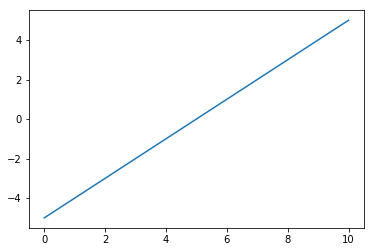

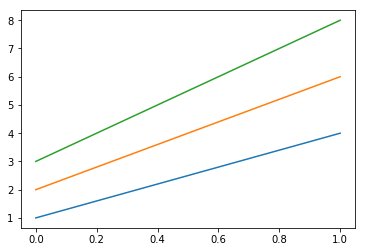

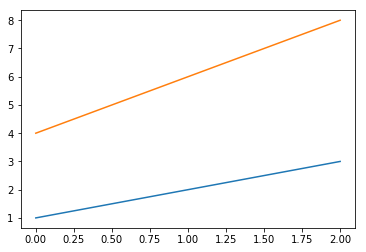

In [2]:
plt.plot(np.arange(-5, 6)) # plotting np.array vs. its indicies
plt.show()
X = np.array([[1, 2, 3],[4, 6,8]])
plt.plot(X) # plotting np.ndarray rows vs. its indicies
plt.show()
plt.plot(X.T) # see the difference
plt.show()

Зазвичай нас буде цікавити графіки функцій вигляду $y = f(x)$, наприклад, графік помилки класифікатора $e = f(\alpha)$ як функції від деякого настройованого параметра $\alpha$. Для побудови графіка функції $y = f(x)$ необхідно визивати plot з двома параметрами plot(x, f(x)). При цьому зручно задавати діапазон змінної з допомогою метода numpy.linspace.

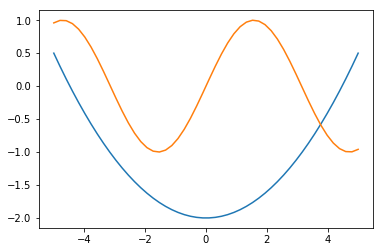

In [3]:
x = np.linspace(-5, 5, 50)
plt.plot(x, x**2 / 10.0 - 2)
plt.plot(x, np.sin(x)) # plotting on the same figure
plt.show()

Отриманий вище графік має явні недоліки:
- по осі х є пусті участки графіків (наприклад, при значеннях x від 5 до 6)
- по осі у графіки впираются в границі координатної сітки, що не завжди зручно 
- осі не мають назв, як і самі графіки

Виправимо їх.

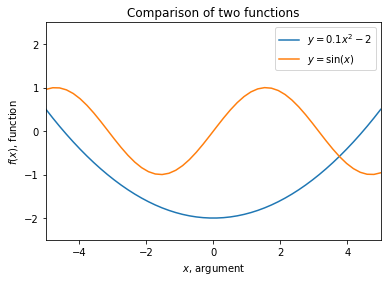

In [4]:
plt.plot(x, x**2 / 10.0 - 2, label = r"$y = 0.1 x^2 - 2$") # label is needed for legend
plt.plot(x, np.sin(x), label = r"$y = \sin(x)$") 
# Label for x-axis. Note: LaTeX can be used inside.
plt.xlabel(r"$x$, argument") 
plt.ylabel(r"$f(x)$, function") # Label for y-axis.
plt.title('Comparison of two functions')
plt.legend(loc = 'upper right') # loc stands for 'location' of legend
plt.xlim((-5, 5)) # Setting limits for x-axis
plt.ylim((-2.5, 2.5)) # and y-axis
plt.show()

Розглянемо ще деякі з основних параметрів метода plot, які позволяють будувати більш різні графіки. 

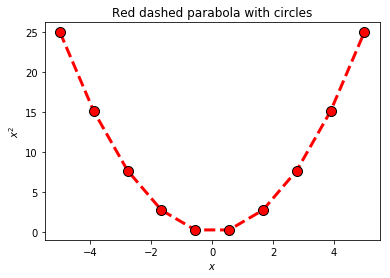

In [5]:
x = np.linspace(-5, 5, 10)
plt.plot(x, x**2, color = 'red', linestyle = 'dashed', marker = 'o',
         markeredgecolor = 'black', markersize = 10, 
         linewidth = 3, label = r"$y = x^2$")
plt.xlabel(r"$x$")
plt.ylabel(r"$x^2$")
plt.title('Red dashed parabola with circles')
plt.show()

Як побудувати декілька різних графіків і розмістити їх так, як нам потрібно? Для цього потрібно викорастати метод subplot. Перші два аргумента вказують розміри сітки, третій аргумент вказує номер підграфіка в цій сітці (нумерація іде зліва на право і зверху вниз). Для зміни розміра використовується метод figure. Отримане зображення можна зберегти з допомогою savefig.

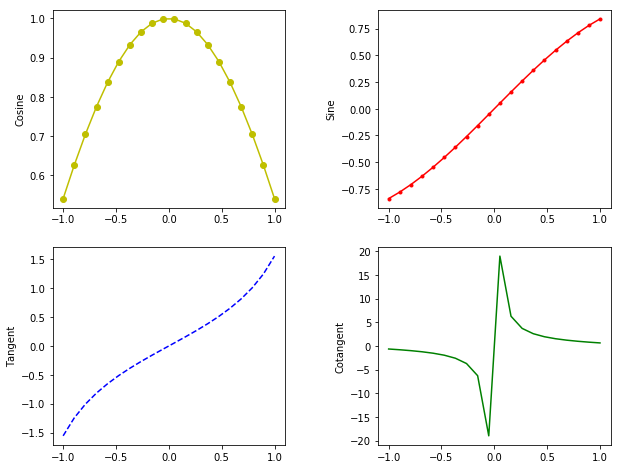

In [6]:
x = np.linspace(-1.0, 1.0, 20)

y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.tan(x)
y4 = y1/y2

plt.figure(figsize = (10,8)) # Creates new figure with given size

plt.subplot(2, 2, 1) # Upper left corner
plt.plot(x, y1, 'yo-')
plt.ylabel('Cosine')

plt.subplot(2, 2, 2) # Upper right corner
plt.plot(x, y2, 'r.-')
plt.ylabel('Sine')

plt.subplot(2, 2, 3) # Lower left corner
plt.plot(x, y3, 'b--')
plt.ylabel('Tangent')

plt.subplot(2, 2, 4) # Lower right corner
plt.plot(x, y4, 'g')
plt.ylabel('Cotangent')

plt.subplots_adjust(wspace = 0.4, hspace = 0.2) # Adjust the distance between the subplots

plt.savefig('../../img/trigonometry.png', dpi = 200) # Saving the image
plt.show()

### Більш просунуте рисування з допомогою figure

Для більш просунутих рисунків рекомендується використовувати об'єкт **fig** класа **Figure**, повертаємий методом **figure**, і працювати з ним. з його допомогою створюємо новий об'єкт **ax**. Виглядає більш громіздко, але це дозволяє більш детально контрулювати графіки, осі і все, що з ними пов'язано.

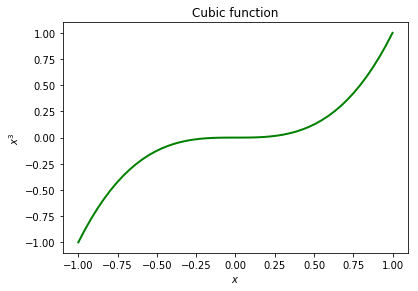

In [7]:
fig = plt.figure()
# Positions of axes in figure: left, bottom, width, height (range 0 to 1)
ax = fig.add_axes([0., 0.1, 0.8, 0.8]) 

x = np.linspace(-1, 1)
ax.plot(x, x**3, 'g', linewidth = 2)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$x^3$")
ax.set_title('Cubic function');

Якщо конкретне положення осей на рисунку нам не важно, ми можемо використовувати об'єкт **ax**, який повертає стандартними методами **matplotlib**. Використання **fig, ax** також зручно при декількох рисунків, з кожним з яких потрібно працювати окремо.

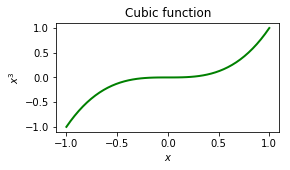

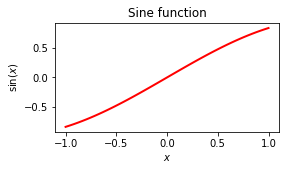

In [8]:
fig1, ax1 = plt.subplots(figsize = (4, 2))

ax1.plot(x, x**3, 'g', linewidth = 2)

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$x^3$")
ax1.set_title('Cubic function');

# Creates new figure, independent from previous.
fig2, ax2 = plt.subplots(figsize = (4, 2)) 
# So we can work with them separately.
x = np.linspace(-1, 1)
ax2.plot(x, np.sin(x), 'r', linewidth = 2)

ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$\sin(x)$")
ax2.set_title('Sine function');

Можна добавити координатну сітку. Зауважимо, що при використанні **subplots**, об'єкт **ax** представляє собою масив.

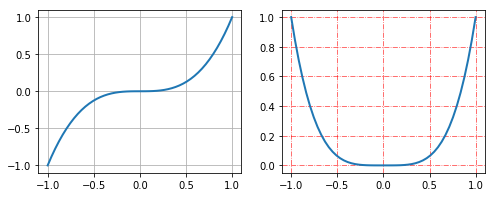

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))

ax[0].plot(x, x**3, linewidth = 2)
ax[0].grid(True) # Default grid

ax[1].plot(x, x**4, linewidth = 2)
ax[1].grid(color = 'r', alpha = 0.7, linestyle = '-.') # Custom grid

Корисною є команда **subplot2grid**, яка дозволяє об'єднати декілька графіків в більш ващі композиції. Метод **tight_layout** використовується для автоматичного вибора позицій осей, так що б графіки не накладались один на другого.

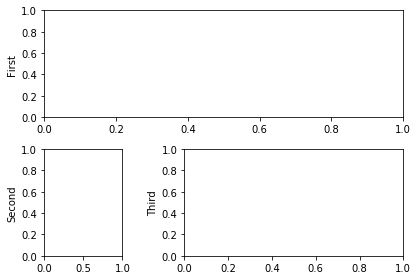

In [10]:
fig = plt.figure()
# Arguments: shape, position and spanning in each (row or col) direction
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=3) 
ax1.set_ylabel('First')
ax2 = plt.subplot2grid((2, 3), (1, 0), colspan=1)
ax2.set_ylabel('Second')
ax3 = plt.subplot2grid((2, 3), (1, 1), colspan=2)
ax3.set_ylabel('Third')
# Automatically adjusts the positions of the axes to prevent overlapping
fig.tight_layout() 

### Інші види графіків

Крім **plot** існує багато інших видів графіків, які можуть виявитись більш наглядними при роботі з даними.

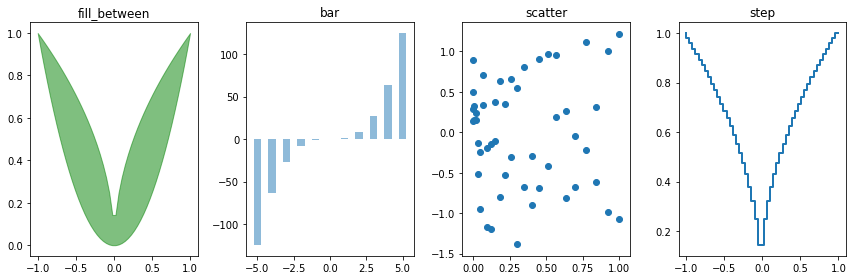

In [11]:
fig, axes = plt.subplots(1, 4, figsize = (12, 4))

axes[0].fill_between(x, np.sqrt(np.abs(x)), x**2, 
                     color="green", alpha=0.5);
axes[0].set_title("fill_between");

axes[1].bar(np.arange(-5, 6), np.arange(-5, 6)**3, 
            align="center", width=0.5, alpha=0.5)
axes[1].set_title("bar")

axes[2].scatter(x**2, x + 0.5 * np.random.randn(len(x)))
axes[2].set_title("scatter")

axes[3].step(x, np.sqrt(np.abs(x)), lw=2)
axes[3].set_title("step")

fig.tight_layout()

Особливої уваги заслуговують методи **hist** і **pie**, які використовуються для побудови гістограм і **pie-chart** графіків.

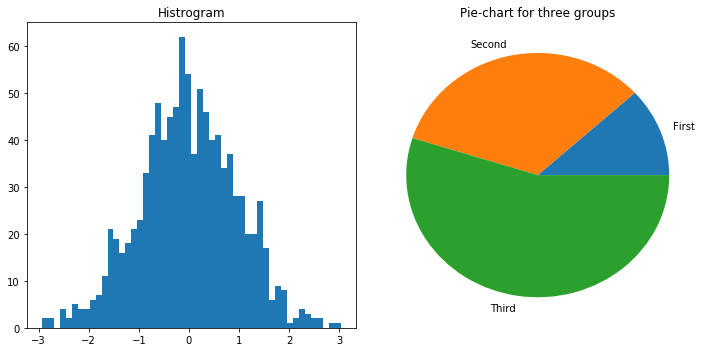

In [12]:
data = np.random.randn(1000)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].hist(data, bins = 50)
ax[0].set_title('Histrogram')

ax[1].pie(np.array([12, 34, 56]), labels = ['First', 'Second', 'Third'])
ax[1].set_title('Pie-chart for three groups')

fig.tight_layout()